In [1]:
#Lazarus Bradley
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#1
titanicData = pd.read_csv(r"C:\Users\lazar\Desktop\machine learning\visual studio-workspace\hw4\titanic.csv")
titanicData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataTypes = titanicData.dtypes
dataTypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#2
titanicData = titanicData[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived',]]

In [5]:
#3
titanicData['Sex'] = titanicData['Sex'].replace(['male'], 1)
titanicData['Sex'] = titanicData['Sex'].replace(['female'], 0)

In [6]:
#4
titanicData.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [7]:
#5
dataTypes = titanicData.dtypes
dataTypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

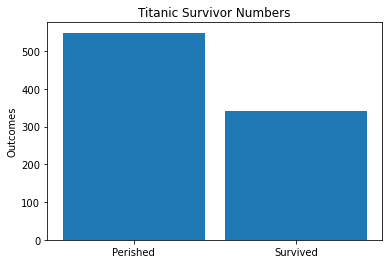

In [8]:
#6
counts = titanicData['Survived'].value_counts()
outcomes = (titanicData['Survived'])
#width between bars
w = 0.35  
plt.bar(x=[0,.4], height=counts, width = w)
plt.xticks([0,.4], ('Perished', "Survived"))

plt.ylabel('Outcomes')
plt.title('Titanic Survivor Numbers')

plt.show()

In [9]:
#7
titanicData.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [10]:
#8
titanicData.groupby(['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [11]:

titanicGroups = titanicData.groupby(['Survived'])
survived = titanicGroups.get_group(0)
perished = titanicGroups.get_group(1)
total = titanicData

survived = survived.mean()
perished = perished.mean()
total = total.mean()

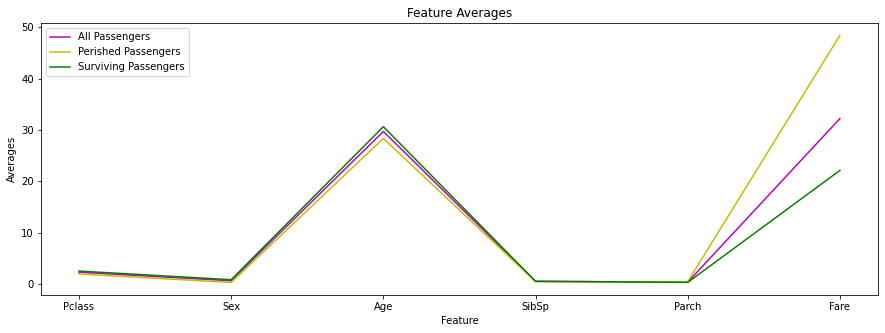

In [12]:
#9
samples = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(15,5))
plt.plot(samples,total[samples],'m',label="All Passengers")
plt.plot(samples,perished[samples],'y',label="Perished Passengers")
plt.plot(samples,survived[samples],'g',label="Surviving Passengers")

plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Averages")
plt.legend()
plt.show()

<Figure size 1080x360 with 0 Axes>

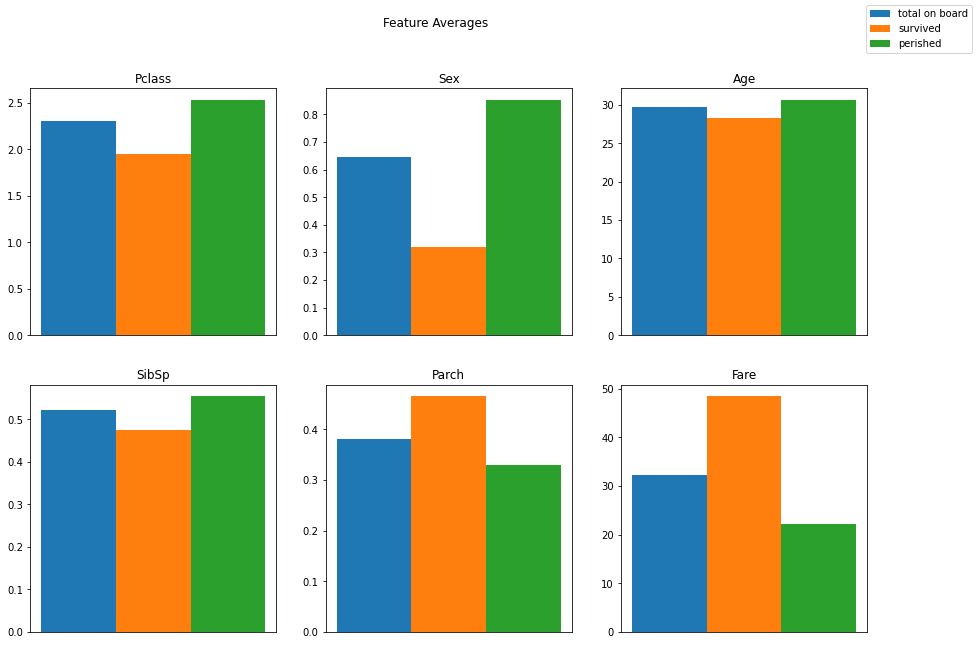

In [13]:
#10
samples = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
#figsize is width, height
plt.figure(figsize=(15,5))
#plot (x, y)
#line plot
width =.2

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
currentItem = samples[0]
row = 0
col = 0
for currentItem in samples:
    if row == 0 and col == 0:
        ax[0,0].bar(0, total[currentItem], width=width, label='total on board')
        ax[0,0].bar(.2, perished[currentItem], width=width, label='survived')
        ax[0,0].bar(.4, survived[currentItem], width=width, label='perished')
        ax[0,0].set_title(currentItem)
    else:
        ax[row,col].bar(0, total[currentItem], width=width)
        ax[row,col].bar(.2, perished[currentItem], width=width)
        ax[row,col].bar(.4, survived[currentItem], width=width)
        ax[row,col].set_title(currentItem)
    ax[row,col].axes.get_xaxis().set_visible(False)
    col += 1
    if col == 3:
        col = 0
        row += 1

fig.suptitle("Feature Averages")

fig.legend()

In [14]:
#11
for currentItem in samples:
    coefficient = np.corrcoef(titanicData[currentItem], titanicData['Survived'])
    print(currentItem, "correlation coefficient: ", coefficient[0,1])

Pclass correlation coefficient:  -0.3384810359610147
Sex correlation coefficient:  -0.5433513806577551
Age correlation coefficient:  nan
SibSp correlation coefficient:  -0.03532249888573558
Parch correlation coefficient:  0.08162940708348365
Fare correlation coefficient:  0.2573065223849623


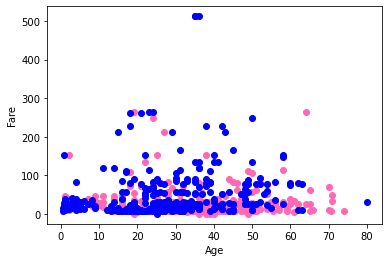

In [15]:
#12
titanicGroups = titanicData.groupby(['Survived'])
survived = titanicGroups.get_group(0)
perished = titanicGroups.get_group(1)

plt.scatter(survived['Age'],survived['Fare'], color = 'hotpink')
plt.scatter(perished['Age'],perished['Fare'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()